In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd;
dfTweetOrig=pd.read_csv("/content/drive/MyDrive/YU-ML-Proj-1/Week8/Tweets.csv")
dfTweetOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
dfTweetOrig.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
dfTweetOrig.shape

(14640, 15)

In [6]:
dfTweetSubset=dfTweetOrig[['tweet_id','airline_sentiment','text']]
dfTweetSubset['textLen']=dfTweetOrig['text'].str.len()

<ipython-input-6-32bdc4832229>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTweetSubset['textLen']=dfTweetOrig['text'].str.len()


In [7]:
dfTweetSubset.shape

(14640, 4)

In [8]:
dfTweetSubset['textLen'].mean()

103.82206284153006

In [9]:
dfTweetSubset['textLen'].max()

186

In [10]:
dfTweetSubset['textLen'].min()

12

In [11]:
dfTweetSubset['textLen']

0         35
1         72
2         71
3        126
4         55
        ... 
14635     63
14636    150
14637     60
14638    135
14639    138
Name: textLen, Length: 14640, dtype: int64

#% of Tweets based on airline_sentiment	Category

In [16]:
df1=dfTweetSubset.groupby('airline_sentiment').count()/14640
df1[['tweet_id']]*100

,tweet_id
airline_sentiment,
negative,62.691257
neutral,21.168033
positive,16.140710


<Axes: xlabel='textLen', ylabel='Count'>

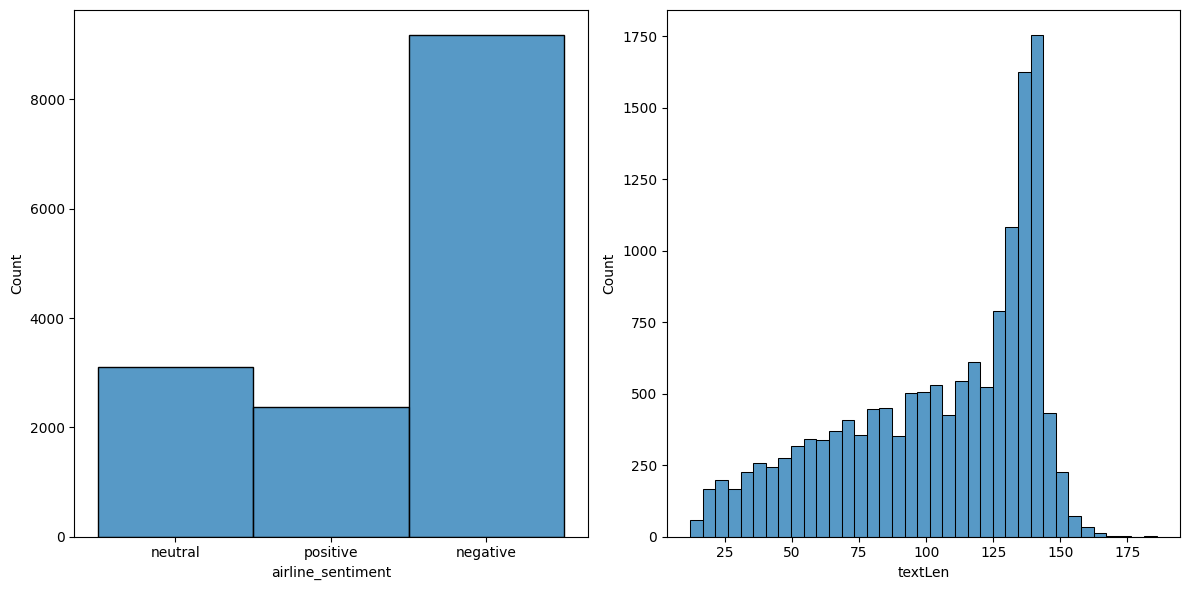

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(1, 2)
import seaborn as sns

sns.histplot(data=dfTweetSubset, x="airline_sentiment", ax=axes[0])
sns.histplot(data=dfTweetSubset, x="textLen", ax=axes[1])

In [ ]:
dfTweetSubset.isnull().sum()

tweet_id                      0
airline_sentiment             0
airline_sentiment_gold    14600
text                          0
textLen                       0
dtype: int64

Duplicate check & removal

In [ ]:
dfTweetSubset.shape

(14640, 5)

#To count number of dupplicates in the data frame.

In [ ]:
dfTweetSubset.duplicated().sum()

127

To Count Duplicates and non duplicates

In [ ]:
dfTweetSubset.duplicated().value_counts()

False    14513
True       127
dtype: int64

#Lets remove the duplicates

In [ ]:
dfTweetSubsetClean1=dfTweetSubset.drop_duplicates()

In [ ]:
dfTweetSubsetClean1.shape

(14513, 5)

In [ ]:
dfTweetSubsetClean1['tweet_id'].unique()

array([570306133677760513, 570301130888122368, 570301083672813571, ...,
       569587242672398336, 569587188687634433, 569587140490866689])

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<ipython-input-20-a73d723735a2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_tweets = dfTweetSubsetClean1[dfTweetSubset['airline_sentiment'] == "positive"]['text'].tolist()


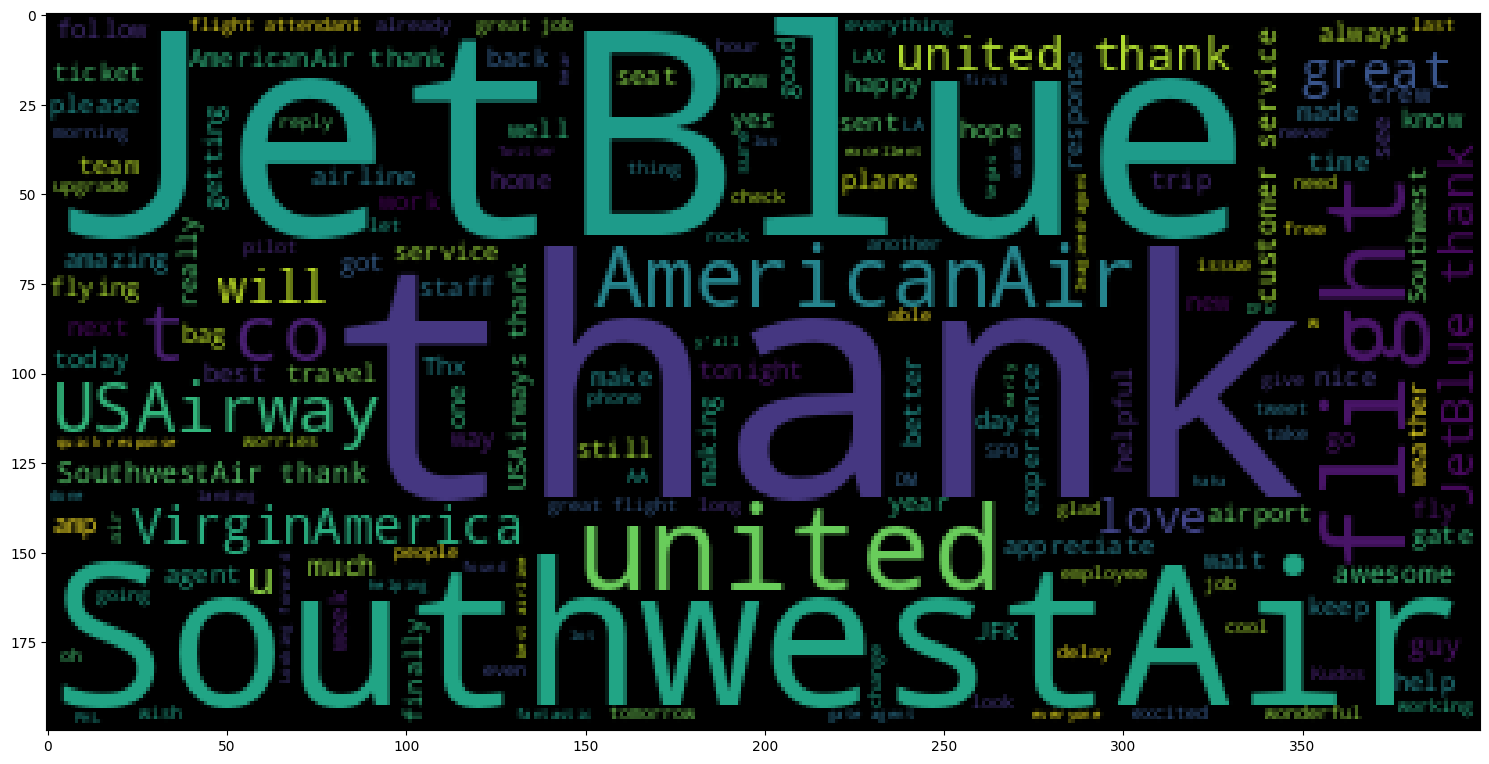

In [ ]:
positive_tweets = dfTweetSubsetClean1[dfTweetSubset['airline_sentiment'] == "positive"]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

<ipython-input-21-d0b00f92fbd4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_tweets = dfTweetSubsetClean1[dfTweetSubset['airline_sentiment'] == "negative"]['text'].tolist()


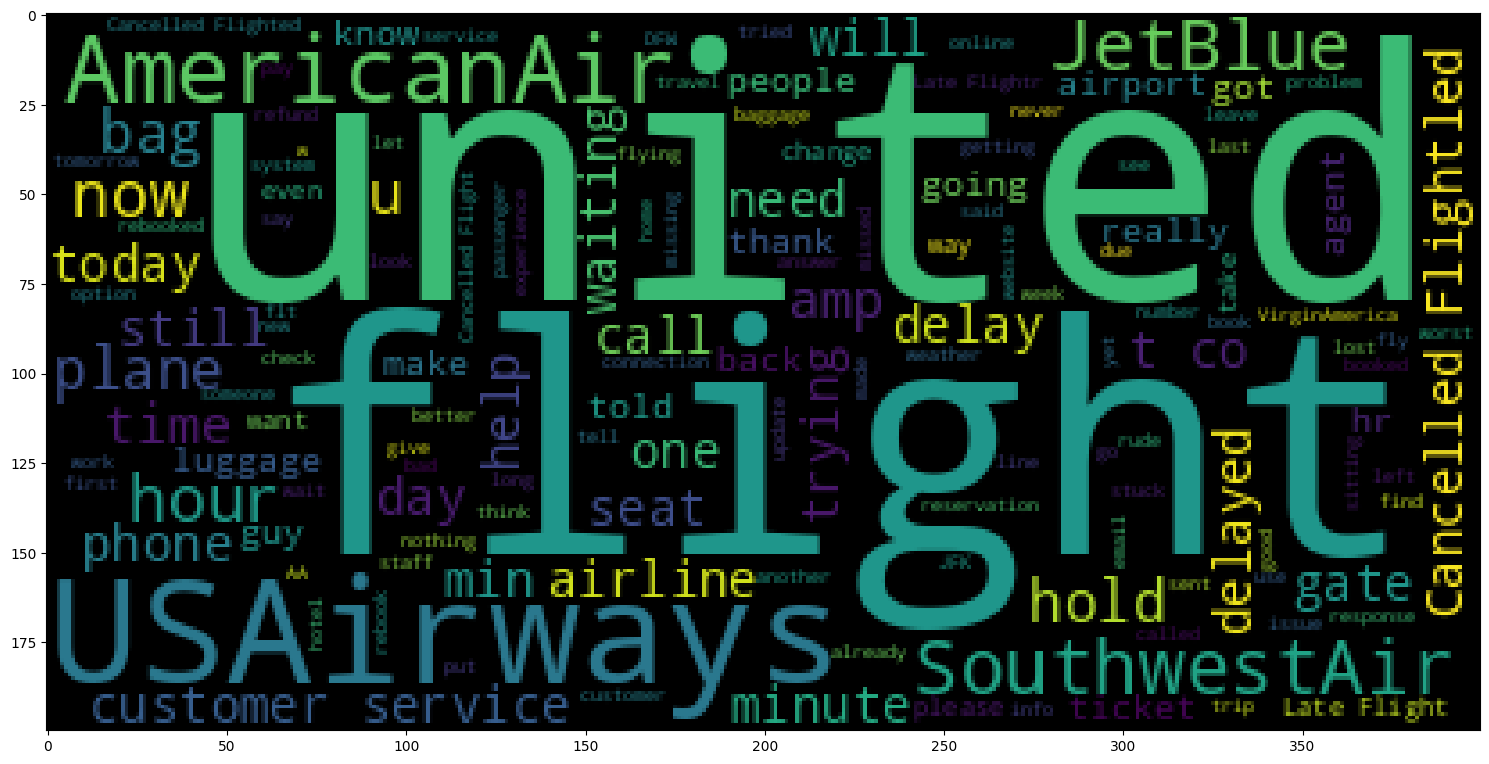

In [ ]:
negative_tweets = dfTweetSubsetClean1[dfTweetSubset['airline_sentiment'] == "negative"]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

<ipython-input-22-a9830abad1f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nutral_tweets = dfTweetSubsetClean1[dfTweetSubset['airline_sentiment'] == "neutral"]['text'].tolist()


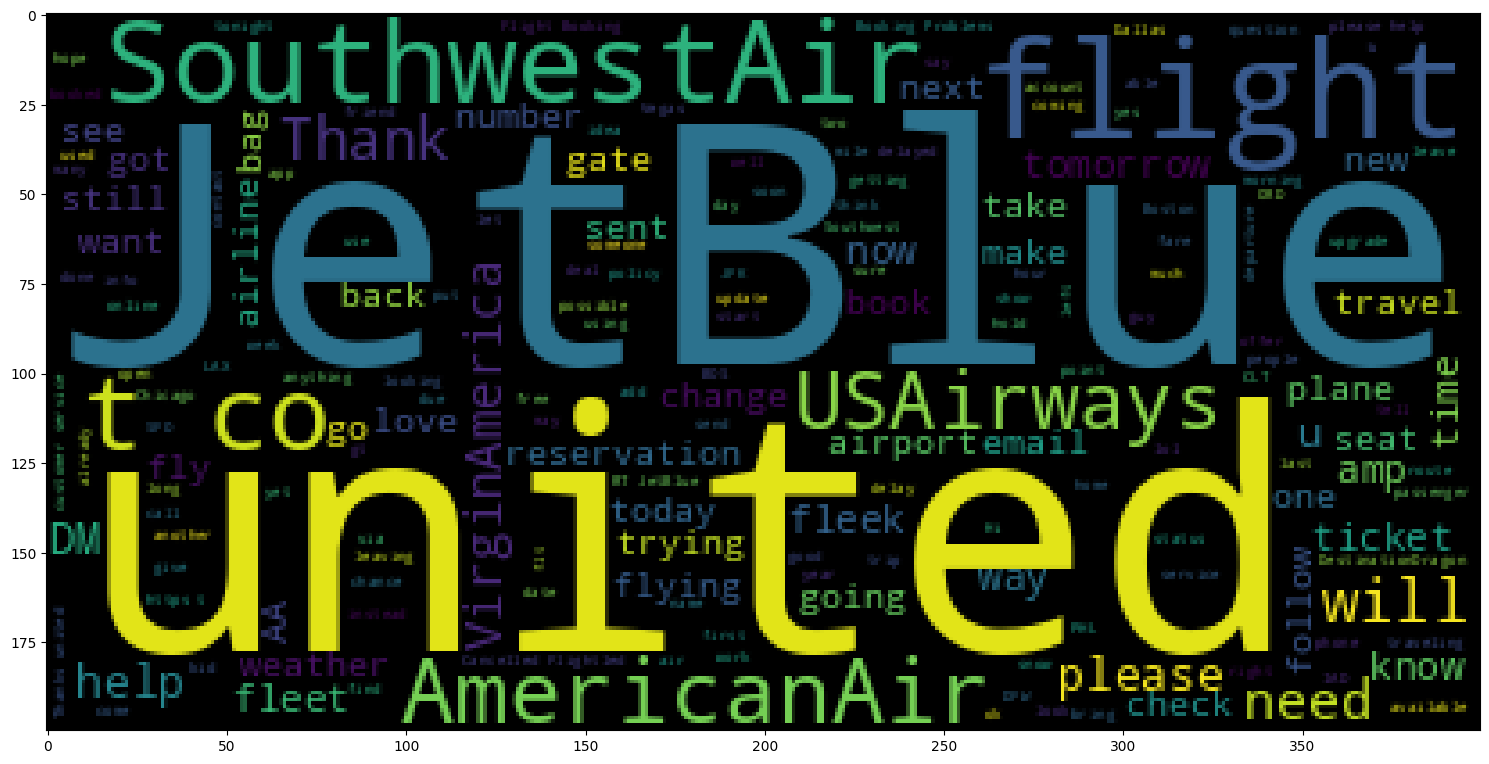

In [ ]:
nutral_tweets = dfTweetSubsetClean1[dfTweetSubset['airline_sentiment'] == "neutral"]['text'].tolist()
nutral_tweets_string = " ".join(nutral_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(nutral_tweets_string))

In [ ]:
dfTweetSubsetClean1['text'].head(100)

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
                            ...                        
95    @VirginAmerica Is it me, or is your website do...
96    @VirginAmerica I can't check in or add a bag. ...
97    @VirginAmerica - Let 2 scanned in passengers l...
98    @virginamerica What is your phone number. I ca...
99    @VirginAmerica is anyone doing anything there ...
Name: text, Length: 100, dtype: object

# Performing Text Data Cleaning steps to remove http, puntuations, unicode characters etc.

In [ ]:
import pandas as pd
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
pd.set_option('display.max_colwidth', None)
dfTweetSubsetClean1['text']

0                                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                                  ...                                                                          
14635                                   

#Removing username that starts with @ symbol, http or https:// and any nonalphanumeric characters

In [ ]:
%time dfTweetSubsetClean1['Tweet_Processed'] = dfTweetSubsetClean1['text'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 188 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dfTweetSubsetClean1[['text','Tweet_Processed']]

,text,Tweet_Processed
0,@VirginAmerica What @dhepburn said.,What said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,I didn t today Must mean I need to take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on a different flight to Chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over 20 minutes Late Flight No warnings or communication until we were 15 minutes Late Flight That s called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,Please bring American Airlines to BlackBerry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",you have my money you change my flight and don t answer your phones Any other suggestions so I can make my commitment


#Transforming the text into lower case

In [ ]:
#Lower Case
%time dfTweetSubsetClean1['Tweet_Processed'] = dfTweetSubsetClean1['Tweet_Processed'].map(lambda x: x.lower())
dfTweetSubsetClean1[['text','Tweet_Processed']]

CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 15.9 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text,Tweet_Processed
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,i didn t today must mean i need to take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on a different flight to chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over 20 minutes late flight no warnings or communication until we were 15 minutes late flight that s called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airlines to blackberry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",you have my money you change my flight and don t answer your phones any other suggestions so i can make my commitment


#Removing the punchuations

In [ ]:
#Remove punctuations
%time dfTweetSubsetClean1['Tweet_Processed'] = dfTweetSubsetClean1['Tweet_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
dfTweetSubsetClean1[['text','Tweet_Processed']]

CPU times: user 34.1 ms, sys: 0 ns, total: 34.1 ms
Wall time: 34.8 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text,Tweet_Processed
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,i didn t today must mean i need to take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on a different flight to chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over 20 minutes late flight no warnings or communication until we were 15 minutes late flight that s called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airlines to blackberry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",you have my money you change my flight and don t answer your phones any other suggestions so i can make my commitment


In [ ]:
#Remove unicodes
%time dfTweetSubsetClean1['Tweet_Processed'] = dfTweetSubsetClean1['Tweet_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))

CPU times: user 42.9 ms, sys: 0 ns, total: 42.9 ms
Wall time: 44.6 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dfTweetSubsetClean1[['text','Tweet_Processed']]

,text,Tweet_Processed
0,@VirginAmerica What @dhepburn said.,what said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you ve added commercials to the experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,i didn t today must mean i need to take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it s really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,@VirginAmerica and it's a really big bad thing about it,and it s a really big bad thing about it
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank you we got on a different flight to chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving over 20 minutes late flight no warnings or communication until we were 15 minutes late flight that s called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airlines to blackberry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",you have my money you change my flight and don t answer your phones any other suggestions so i can make my commitment


#Removing the stop words excluding "not" since it can change the context of the sentence significantly!

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.remove('not')
%time dfTweetSubsetClean1['Tweet_Processed'] = dfTweetSubsetClean1['Tweet_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
dfTweetSubsetClean1[['text','Tweet_Processed']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


CPU times: user 373 ms, sys: 0 ns, total: 373 ms
Wall time: 374 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,text,Tweet_Processed
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,today must mean need take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guests faces amp little recourse
4,@VirginAmerica and it's a really big bad thing about it,really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving 20 minutes late flight warnings communication 15 minutes late flight called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airlines blackberry10
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight answer phones suggestions make commitment


#  After the Initial Exploratory data analysis done, we have performed the Model development & Tuning